In [1]:
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

# Database connection settings.
DB_HOST = "192.168.1.103"
DB_PORT = "5432"
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"

# Create engine and session.
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}",
    pool_size=20,
    max_overflow=40
)


In [2]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd

query = "select user_id, customer_name, time, rating from reviews"
reviews = pd.read_sql(query,engine)




In [ ]:
reviews.head()

,user_id,customer_name,time,rating
0,104432654175532153720,Ashley Midkiff,2017-10-26 00:09:37.058,5.0
1,102706039738339892691,Milly KillnEm,2017-10-30 15:47:23.629,4.0
2,110027878096746344469,Miles Mu,2017-10-29 21:45:14.670,1.0
3,116549850889037513240,robert gemmel,2017-11-01 20:28:44.719,5.0
4,105381178878751201871,Michaveli Rare4orm,2017-11-01 20:28:50.759,4.0


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699421 entries, 0 to 21699420
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   customer_name  object        
 2   time           datetime64[ns]
 3   rating         float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 662.2+ MB


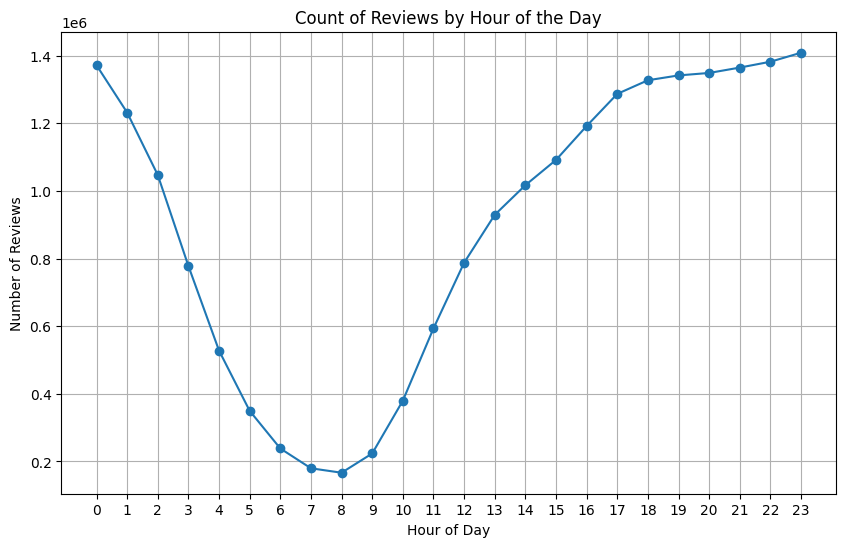

In [ ]:
reviews['hour'] = reviews['time'].dt.hour

# Group by hour and count the number of reviews
hourly_counts = reviews.groupby('hour')['rating'].count().reset_index(name='reviews_count')

# Plot the count of reviews by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts['hour'], hourly_counts['reviews_count'], marker='o', linestyle='-')
plt.title('Count of Reviews by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

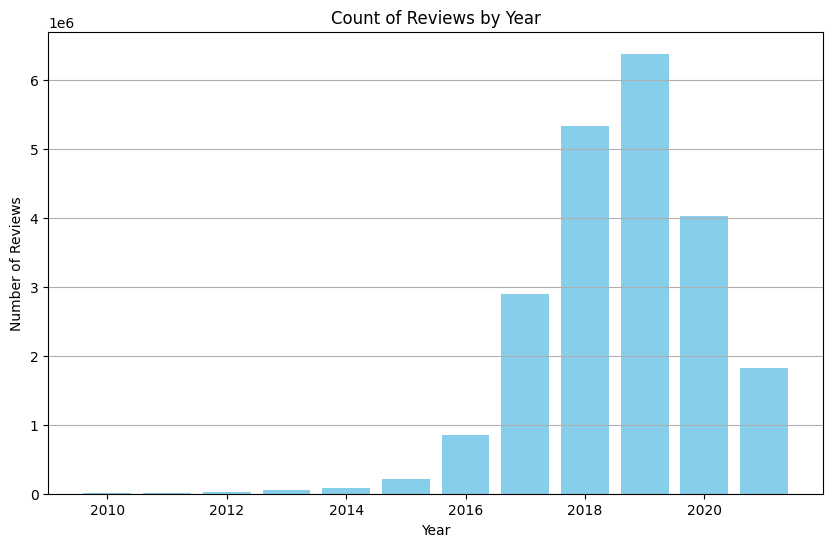

In [ ]:
reviews = reviews[reviews['time'].dt.year >= 2010]
# Group by year and count the number of reviews
reviews['year'] = reviews['time'].dt.year

yearly_counts = reviews.groupby('year').size().reset_index(name='reviews_count')


# Plot the count of reviews by year using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['year'], yearly_counts['reviews_count'], color='skyblue')
plt.title('Count of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

In [ ]:
business = pd.read_sql("select gmap_id, business_name, avg_rating, num_of_reviews, category, price from business", engine)

In [ ]:
business.head()

,gmap_id,business_name,avg_rating,num_of_reviews,category,price
0,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,4.5,25,"{""Pizza delivery""}",None
1,0x89c48c790b767ec7:0x1943c20a42196a68,S.J. O’Hara Inc.,4.5,8,"{""HVAC contractor"",""Air conditioning contracto...",None
2,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,4.0,8,{Restaurant},None
3,0x89c6c63c8cd87141:0x54d0d283872eecbb,Kater Street Bicycle,4.9,15,"{""Bicycle Shop"",""Bicycle repair shop""}",None
4,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,Cadence Cycling and Cafe - Center City,4.8,38,"{""Bicycle Shop"",""Bicycle repair shop"",""Coffee ...",None


In [ ]:
business['num_of_reviews'].describe()

count    189836.000000
mean        115.502660
std         314.745819
min           1.000000
25%           8.000000
50%          28.000000
75%          96.000000
max        9998.000000
Name: num_of_reviews, dtype: float64

In [ ]:
business['category'].unique()

array(['{"Pizza delivery"}',
       '{"HVAC contractor","Air conditioning contractor","Air conditioning repair service","Air duct cleaning service","Drainage service","Heating contractor",Plumber}',
       '{Restaurant}', ...,
       '{Supermarket,"Grocery store","Produce wholesaler"}',
       '{"Eastern Orthodox Church",Church,"Greek Orthodox church"}',
       '{"American restaurant","Conference center","Fine dining restaurant",Hotel,Inn,"Wedding venue"}'],
      dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import csv
from io import StringIO
from itertools import chain

# Assuming 'business' is your DataFrame with a 'category' column
# For example:
# business = pd.read_csv('your_business_data.csv')

unique_values = set()

for entry in business['category']:
    # Skip entries that are None
    if entry is None:
        continue
    # Remove outer curly braces if present
    if entry.startswith('{') and entry.endswith('}'):
        entry = entry[1:-1]
    # Use csv.reader to handle comma-separated values and quotes
    f = StringIO(entry)
    reader = csv.reader(f, skipinitialspace=True)
    for row in reader:
        for item in row:
            # Clean each item by stripping whitespace and any surrounding quotes
            cleaned = item.strip().strip('"')
            if cleaned:
                unique_values.add(cleaned)

# Convert the set to a sorted list (optional)
unique_list = sorted(unique_values)
print("Unique values:")
print(unique_list)


Unique values:
['3D printing service', 'ATM', 'ATV dealer', 'ATV rental service', 'ATV repair shop', 'Abbey', 'Abortion clinic', 'Abrasives supplier', 'Accountant', 'Accounting', 'Accounting firm', 'Accounting school', 'Accounting software company', 'Acoustical consultant', 'Acrylic store', 'Acupuncture clinic', 'Acupuncturist', 'Acura dealer', 'Addiction treatment center', 'Administrative attorney', 'Adoption agency', 'Adult DVD store', 'Adult day care center', 'Adult education school', 'Adult entertainment club', 'Adult entertainment store', 'Adult foster care service', 'Adventure sports', 'Adventure sports center', 'Advertising agency', 'Advertising service', 'Aerial photographer', 'Aerial sports center', 'Aerobics instructor', 'Aeroclub', 'Aerospace company', 'Afghani restaurant', 'African goods store', 'African restaurant', 'After school program', 'Aged care', 'Aggregate supplier', 'Agricultural', 'Agricultural association', 'Agricultural cooperative', 'Agricultural machinery manu

In [ ]:
len(unique_list)

3484

In [ ]:
business['category'].isnull().sum()

886

In [ ]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189836 entries, 0 to 189835
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gmap_id         189836 non-null  object 
 1   business_name   189836 non-null  object 
 2   avg_rating      189836 non-null  float64
 3   num_of_reviews  189836 non-null  int64  
 4   category        188950 non-null  object 
 5   price           0 non-null       object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.7+ MB


In [ ]:
c=0
for i in unique_list:
    if 'food' in str(i):
        c+=1
        print(i)

Catering food and drink supplier
Country food restaurant
Dried seafood store
Fast food restaurant
Fresh food market
Frozen food manufacturer
Frozen food store
Health food restaurant
Health food store
Organic food store
Pet food and animal feeds
Raw food restaurant
Seafood
Seafood market
Seafood restaurant
Seafood store
Seafood wholesaler
Soul food restaurant
Wholesale food store


In [ ]:
ulist = pd.DataFrame(unique_list)

In [ ]:
import pandas as pd

mapping = {
    'Food': [
        'restaurant', 'pizza', 'cafe', 'bakery', 'diner', 'bistro', 'fast food', 
        'sandwich', 'steakhouse', 'barbecue', 'pizzeria', 'food', 'grill', 'buffet'
    ],
    'Home Services': [
        'plumber', 'hvac', 'air conditioning', 'heating', 'air duct', 'drainage',
        'electrician', 'handyman', 'pest control', 'cleaning', 'landscaping',
        'maintenance', 'repair', 'home improvement', 'moving', 'contractor'
    ],
    'Retail': [
        'supermarket', 'store', 'boutique', 'clothing', 'fashion', 'retail', 'shop',
        'mall', 'market', 'discount', 'department store', 'outlet', 'apparel'
    ],
    'Religious': [
        'church', 'temple', 'mosque', 'synagogue', 'orthodox', 'ministry', 'cathedral', 
        'chapel', 'religious'
    ],
    'Hospitality': [
        'hotel', 'inn', 'motel', 'resort', 'lodging', 'accommodation', 'bed and breakfast',
        'wedding', 'conference', 'banquet', 'hostel'
    ],
    'Rental Service': [
        'rental', 'lease', 'apartments', 'housing', 'real estate', 'landlord', 
        'property', 'leasing', 'vacation rental', 'short term', 'rental service'
    ],
    'Health & Medical': [
        'health', 'medical', 'dentist', 'doctor', 'clinic', 'hospital', 'urgent care',
        'pharmacy', 'wellness', 'chiropractic', 'optometrist', 'physician', 'veterinary',
        'therapy', 'mental health'
    ],
    'Automotive': [
        'auto', 'car', 'repair', 'mechanic', 'dealership', 'car wash', 'tire', 'garage',
        'automotive', 'vehicle', 'motorcycle', 'truck', 'auto service', 'oil change'
    ],
    'Entertainment & Arts': [
        'theater', 'cinema', 'movie', 'museum', 'gallery', 'concert', 'performance',
        'music', 'dance', 'club', 'entertainment', 'art', 'live', 'show', 'comedy'
    ],
    'Professional Services': [
        'law', 'attorney', 'accountant', 'legal', 'consulting', 'architect', 'engineer',
        'agency', 'business services', 'consultant', 'financial advisor', 'marketing'
    ],
    'Education': [
        'school', 'college', 'university', 'institute', 'tutoring', 'education', 'training',
        'learning center', 'academy', 'class', 'course'
    ],
    'Beauty & Spas': [
        'beauty', 'spa', 'salon', 'barber', 'cosmetics', 'hair', 'nail', 'massage',
        'aesthetics', 'makeup', 'skincare'
    ],
    'Sports & Recreation': [
        'gym', 'fitness', 'sport', 'recreation', 'athletic', 'club', 'stadium', 'park',
        'yoga', 'martial arts', 'fitness center', 'outdoor', 'cycling', 'swimming'
    ],
    'Travel & Transportation': [
        'travel', 'airport', 'transportation', 'taxi', 'limo', 'shuttle', 'bus', 
        'railway', 'train', 'flight', 'airline', 'car rental', 'transit', 'commute'
    ],
    'Technology': [
        'tech', 'computer', 'electronics', 'it', 'software', 'hardware', 'repair',
        'mobile', 'gadget', 'telecom', 'internet'
    ],
    'Home & Garden': [
        'furniture', 'home decor', 'garden', 'landscaping', 'interior design',
        'home improvement', 'decor', 'housewares'
    ],
    'Financial Services': [
        'bank', 'insurance', 'finance', 'investment', 'financial', 'money', 'mortgage',
        'credit', 'loan', 'accounting', 'capital'
    ],
    'Arts & Crafts': [
        'art', 'craft', 'supplies', 'studio', 'handmade', 'crafts', 'design', 'gallery'
    ],
    'Miscellaneous': [
        'miscellaneous', 'other', 'general', 'variety', 'everything', 'all others'
    ]
}

def map_category(sub_category):
    """Map a single subcategory string to a main category using the mapping dictionary."""
    sub_category_lower = sub_category.lower()
    for main_cat, keywords in mapping.items():
        if any(keyword in sub_category_lower for keyword in keywords):
            return main_cat
    return 'Other'

def parse_and_map_categories(category_str):
    """
    Convert the string representation of subcategories into a list,
    then map each subcategory to its main category.
    Returns a sorted list of unique main categories.
    """
    if pd.isnull(category_str):
        return None

    if category_str.startswith('{') and category_str.endswith('}'):
        category_str = category_str[1:-1]

    f = StringIO(category_str)
    reader = csv.reader(f, skipinitialspace=True)
    subcategories = []
    for row in reader:
        for item in row:
            cleaned = item.strip().strip('"')
            if cleaned:
                subcategories.append(cleaned)
                
    main_categories = set(map(map_category, subcategories))
    return sorted(main_categories)

business['main_category'] = business['category'].apply(parse_and_map_categories)


In [ ]:
business.head()

,gmap_id,business_name,avg_rating,num_of_reviews,category,price,main_category
0,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,4.5,25,"{""Pizza delivery""}",None,[Food]
1,0x89c48c790b767ec7:0x1943c20a42196a68,S.J. O’Hara Inc.,4.5,8,"{""HVAC contractor"",""Air conditioning contracto...",None,[Home Services]
2,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,4.0,8,{Restaurant},None,[Food]
3,0x89c6c63c8cd87141:0x54d0d283872eecbb,Kater Street Bicycle,4.9,15,"{""Bicycle Shop"",""Bicycle repair shop""}",None,"[Home Services, Retail]"
4,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,Cadence Cycling and Cafe - Center City,4.8,38,"{""Bicycle Shop"",""Bicycle repair shop"",""Coffee ...",None,"[Home Services, Retail]"


In [ ]:
df_exploded = business.explode('main_category')
binary_matrix = pd.crosstab(df_exploded['gmap_id'], df_exploded['main_category'])

binary_matrix = (binary_matrix > 0).astype(int)

result = business.merge(binary_matrix, on='gmap_id', how='left')

In [ ]:

pd.set_option('display.max_columns', None)


In [ ]:
result.to_csv('cleaned_business.csv')

Category Statistics:
          main_category  num_businesses  avg_rating  avg_num_reviews  \
0         Arts & Crafts            1192    4.629279        46.011745   
1            Automotive           13552    4.302037        96.729486   
2         Beauty & Spas            8644    4.481941        57.873554   
3             Education            2905    4.320138        61.454045   
4  Entertainment & Arts            8394    4.300036       147.981296   

   total_reviews  
0          54846  
1        1310878  
2         500259  
3         178524  
4        1242155  


C:\Users\rushi\AppData\Local\Temp\ipykernel_37488\3912431162.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='num_businesses', y='main_category', palette='viridis')


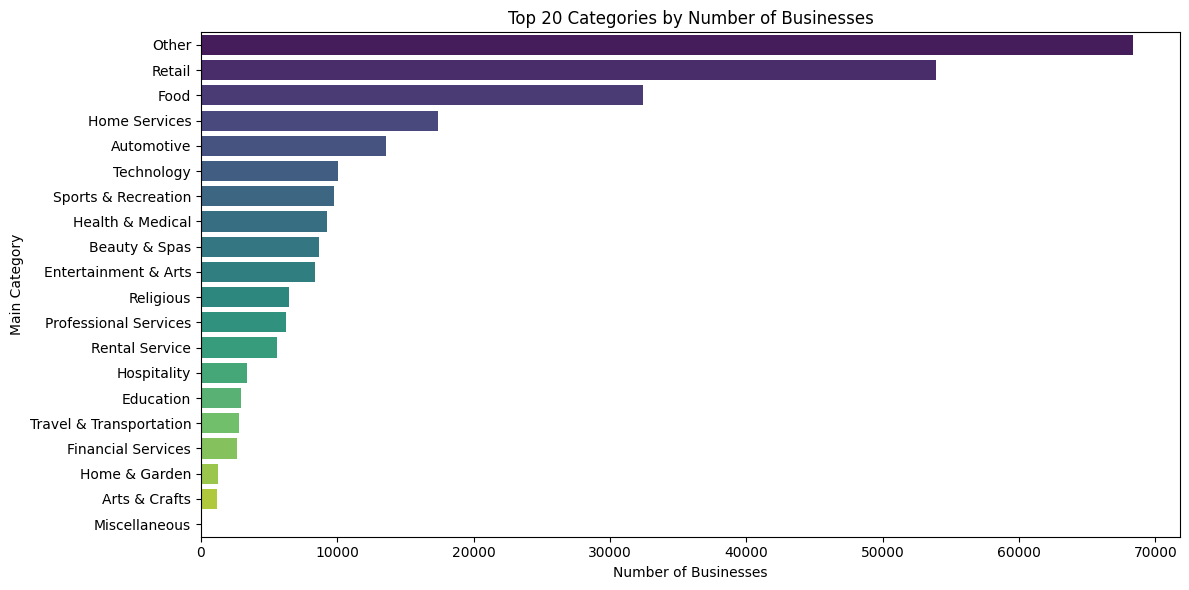

C:\Users\rushi\AppData\Local\Temp\ipykernel_37488\3912431162.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='avg_rating', y='main_category', palette='magma')


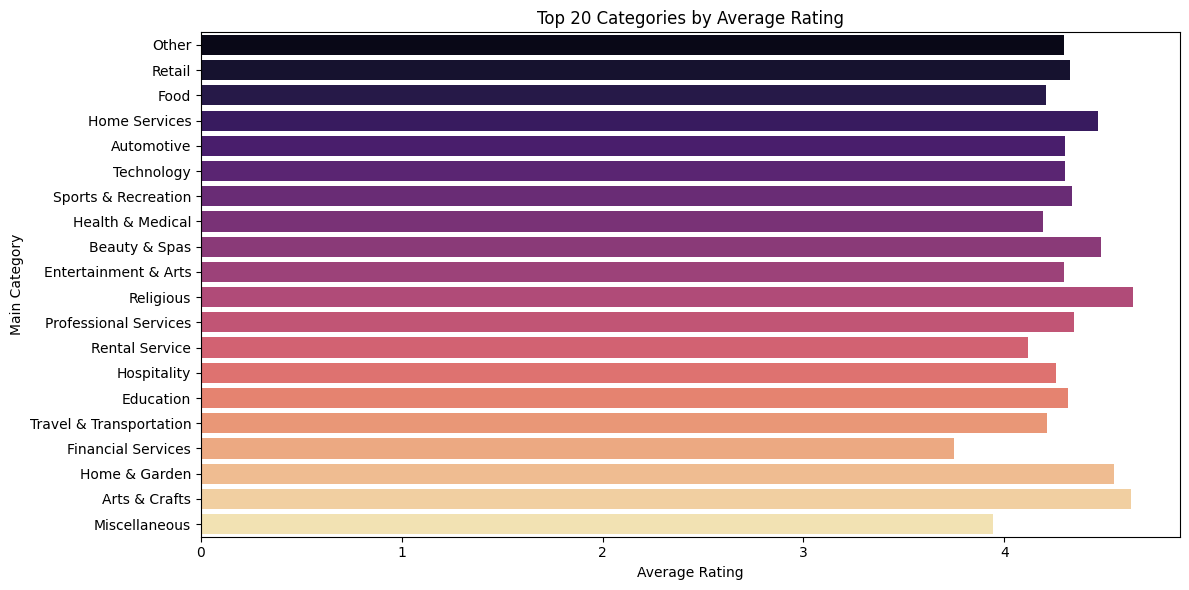

C:\Users\rushi\AppData\Local\Temp\ipykernel_37488\3912431162.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='avg_num_reviews', y='main_category', palette='coolwarm')


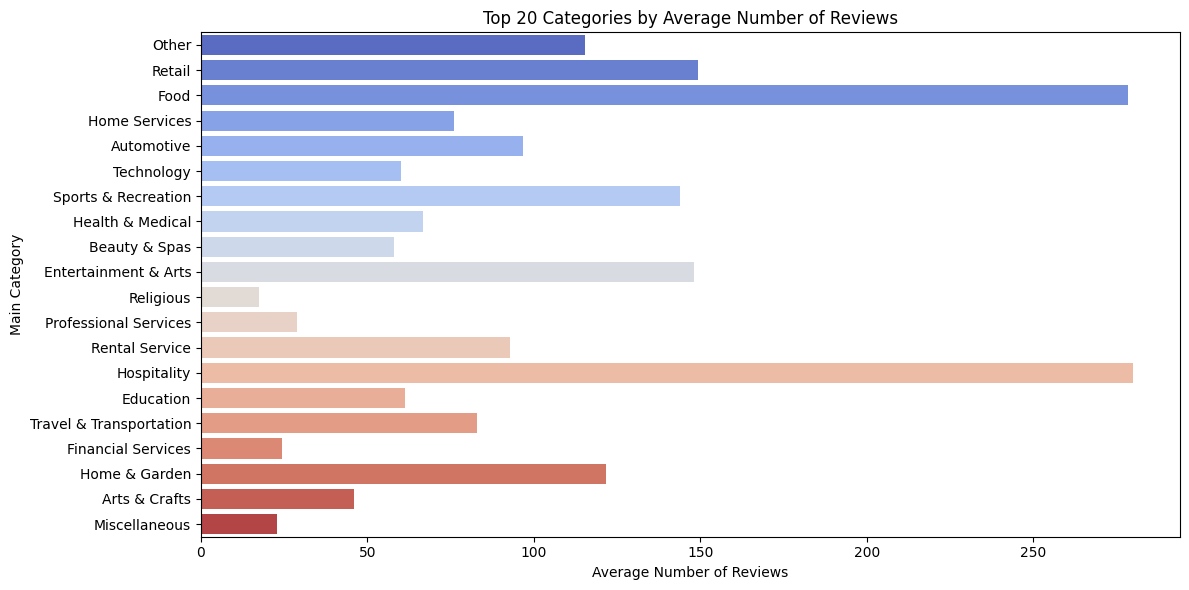

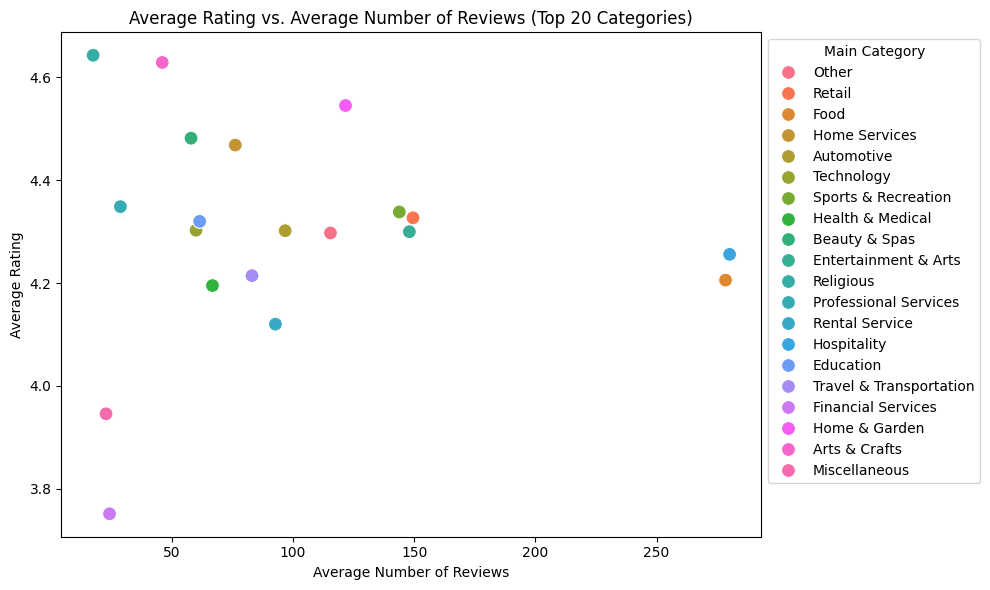

In [ ]:
import seaborn as sns

df_exploded = result.explode('main_category')
df_exploded['main_category'] = df_exploded['main_category'].str.strip()

category_stats = df_exploded.groupby('main_category').agg(
    num_businesses=('gmap_id', 'nunique'),
    avg_rating=('avg_rating', 'mean'),
    avg_num_reviews=('num_of_reviews', 'mean'),
    total_reviews=('num_of_reviews', 'sum')
).reset_index()

print("Category Statistics:")
print(category_stats.head())

top_categories = category_stats.sort_values('num_businesses', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(data=top_categories, x='num_businesses', y='main_category', color='skyblue')
plt.title('Top 20 Categories by Number of Businesses')
plt.xlabel('Number of Businesses')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

# Plot 2: Bar chart of the average rating per category
plt.figure(figsize=(12,6))
sns.barplot(data=top_categories, x='avg_rating', y='main_category', color='salmon')
plt.title('Top 20 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

# Plot 3: Bar chart of the average number of reviews per category
plt.figure(figsize=(12,6))
sns.barplot(data=top_categories, x='avg_num_reviews', y='main_category', color='lightgreen')
plt.title('Top 20 Categories by Average Number of Reviews')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

# Plot 4: Scatter plot of average rating vs. average number of reviews for the top categories
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_categories, x='avg_num_reviews', y='avg_rating', color='purple', s=100)
plt.title('Average Rating vs. Average Number of Reviews (Top 20 Categories)')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\MS_DS\RG_Winter25\Capstone 1 DSCI 591\cleaned_business.csv")

In [ ]:
df.head()

,Unnamed: 0,gmap_id,business_name,avg_rating,num_of_reviews,category,price,main_category,Arts & Crafts,Automotive,...,Hospitality,Miscellaneous,Other,Professional Services,Religious,Rental Service,Retail,Sports & Recreation,Technology,Travel & Transportation
0,0,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,4.5,25,"{""Pizza delivery""}",NaN,['Food'],0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0x89c48c790b767ec7:0x1943c20a42196a68,S.J. O’Hara Inc.,4.5,8,"{""HVAC contractor"",""Air conditioning contracto...",NaN,['Home Services'],0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,4.0,8,{Restaurant},NaN,['Food'],0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0x89c6c63c8cd87141:0x54d0d283872eecbb,Kater Street Bicycle,4.9,15,"{""Bicycle Shop"",""Bicycle repair shop""}",NaN,"['Home Services', 'Retail']",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,Cadence Cycling and Cafe - Center City,4.8,38,"{""Bicycle Shop"",""Bicycle repair shop"",""Coffee ...",NaN,"['Home Services', 'Retail']",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

# Database connection settings.
DB_HOST = "192.168.1.103"
DB_PORT = "5432"
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"

# Create engine and session.
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}",
    pool_size=20,
    max_overflow=40
)


In [ ]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
query = "select user_id, customer_name, first_review_date, last_review_date, total_reviews, avg_rating as user_avg_rating from users"
users = pd.read_sql(query,engine)


In [ ]:
query = "select user_id, time, rating, gmap_id, customer_name from reviews"
reviews = pd.read_sql(query,engine)


C:\Users\rushi\AppData\Local\Temp\ipykernel_55724\752561957.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='avg_rating', shade=True, color='blue')


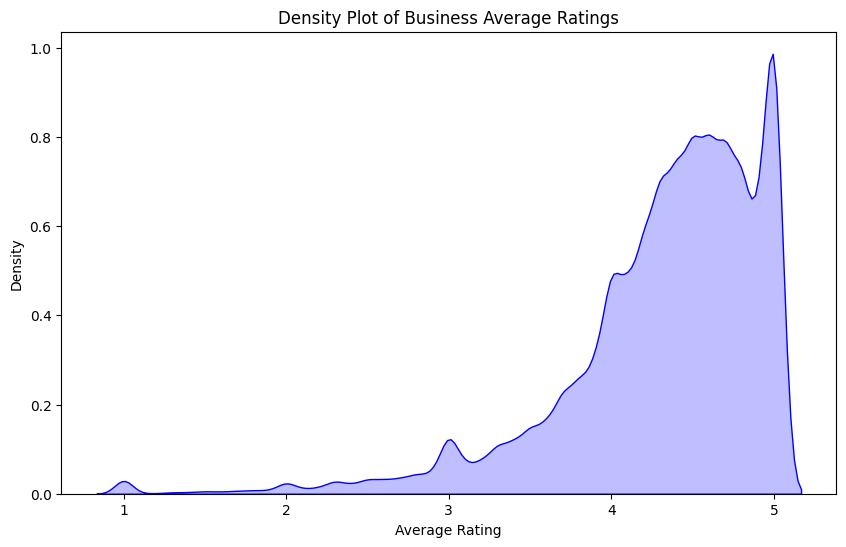

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='avg_rating', shade=True, color='blue')
plt.title("Density Plot of Business Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.show()

In [ ]:
users.head()

,user_id,customer_name,first_review_date,last_review_date,total_reviews,user_avg_rating
0,118446717614999951016,James Billings,2015-06-07 21:52:40.740,2015-06-07 21:52:40.740,1,5.0
1,118446725185281394757,Jodie Hayford,2017-07-23 00:53:57.977,2017-07-23 00:53:57.977,1,3.0
2,118446696946959024765,russell zarzeczny,2019-12-30 02:16:31.395,2019-12-30 02:16:31.395,1,1.0
3,118446703820689773600,Emma Johnson,2019-07-16 15:17:56.371,2019-07-16 15:17:56.371,1,5.0
4,118446683655957264030,John Riley,2018-11-20 02:39:36.713,2018-11-20 02:39:36.713,1,5.0


C:\Users\rushi\AppData\Local\Temp\ipykernel_56700\3365263471.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_top['year_month'] = reviews_top['time'].dt.to_period('M').dt.to_timestamp()


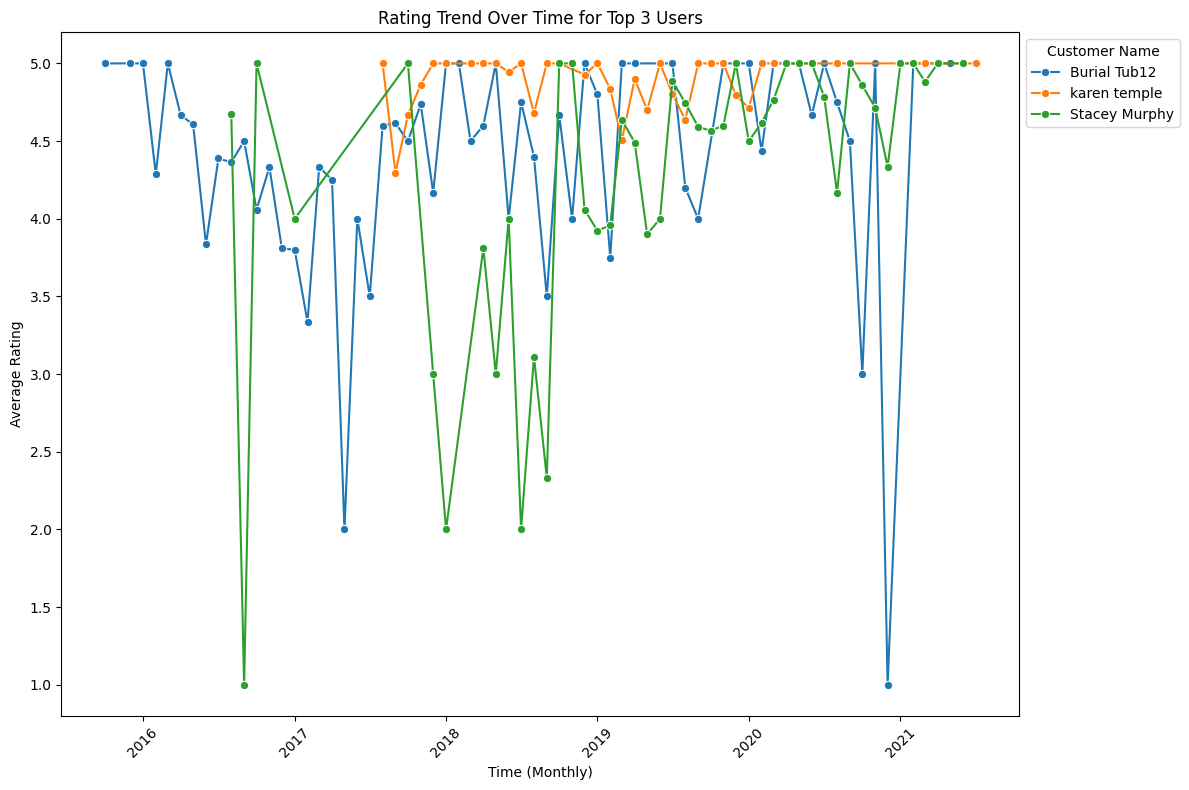

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_users = users.sort_values('total_reviews', ascending=False).head(3)
top_user_ids = top_users['user_id'].tolist()
reviews_top = reviews[reviews['user_id'].isin(top_user_ids)]

reviews_top['year_month'] = reviews_top['time'].dt.to_period('M').dt.to_timestamp()

user_rating_trend = reviews_top.groupby(['user_id', 'year_month'])['rating'].mean().reset_index()

user_rating_trend = user_rating_trend.merge(users[['user_id', 'customer_name']], on='user_id', how='left')


plt.figure(figsize=(12, 8))
sns.lineplot(data=user_rating_trend, x='year_month', y='rating', hue='customer_name', marker='o')
plt.title("Rating Trend Over Time for Top 3 Users")
plt.xlabel("Time (Monthly)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title='Customer Name', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()